# The removal of triple effects using cpDistiller

In [1]:
import scanpy as sc
import anndata as ad
from cpDistiller import DataSet,labeled,cpDistiller_Model,merge_csv2h5ad,merge_csv,MAD
import matplotlib.pyplot as plt
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

<div class="alert note">
<p>
UMAP visualization of 12 batches demonstrated triple effects, including batch, row, and column effects.
</p>
</div>


         Falling back to preprocessing with `sc.pp.pca` and default params.


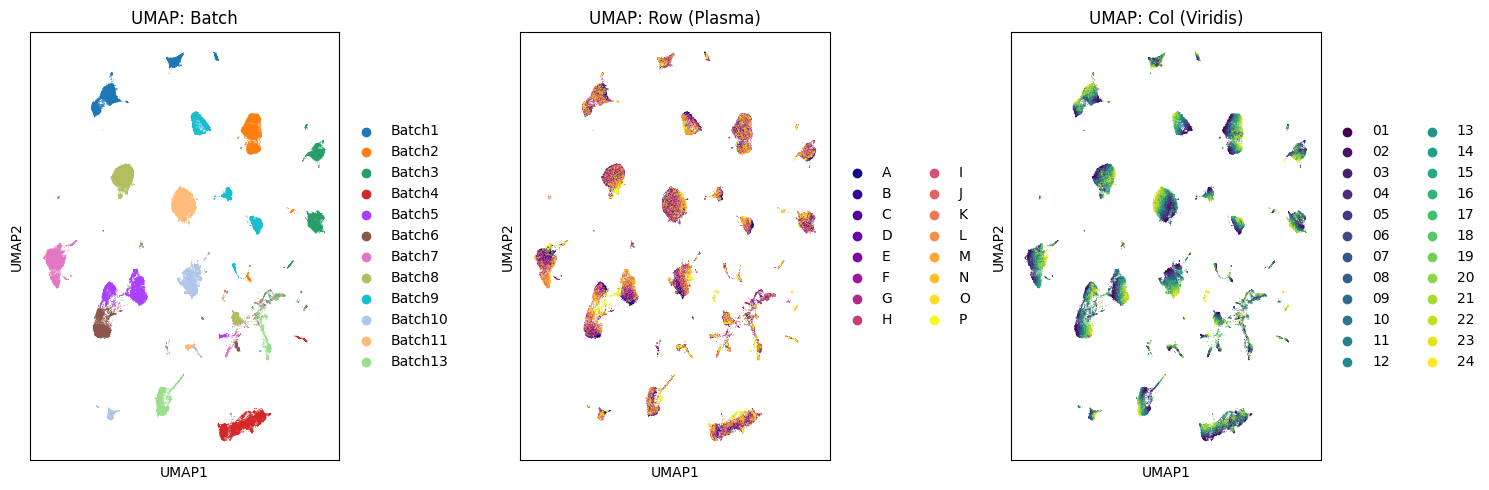

In [2]:
data = ad.read_h5ad('/data/pub/cell/cpg0016_source4/cpg0016orf.h5ad')
sc.pp.scale(data)    
sc.pp.neighbors(data, n_neighbors=15)
sc.tl.umap(data, random_state=9000, min_dist=0.1)
plt.figure(figsize=(15, 5))
sc.pl.umap(data, color="batch", ax=plt.subplot(1, 3, 1), show=False)
plt.title('UMAP: Batch')
sc.pl.umap(data, color="row", palette='plasma', ax=plt.subplot(1, 3, 2), show=False)
plt.title('UMAP: Row (Plasma)')
sc.pl.umap(data, color="col", palette='viridis', ax=plt.subplot(1, 3, 3), show=False)
plt.title('UMAP: Col (Viridis)')
plt.tight_layout()
plt.show()

<div class="alert note">
<p>
We used cpDistiller to correct triple effects, using both cpDistiller-extractor-based features and CellProfiler-based features.
</p>
</div>


2025-05-23 04:11:52,908 - INFO - MNN pairs num: 122312
2025-05-23 04:12:10,532 - INFO - KNN pairs num: 23401
2025-05-23 04:13:07,025 - INFO - GMVAE_DL(
  (pca_attention): PCAAttentionBlock(
    (attention): EfficientAttention(
      (avg_pool): AdaptiveAvgPool2d(output_size=1)
      (conv1): Conv1d(1, 1, kernel_size=(1,), stride=(1,), bias=False)
      (sigmoid): Sigmoid()
    )
    (pca_linear): Linear(in_features=144, out_features=32, bias=True)
    (attetion_linear): Linear(in_features=144, out_features=32, bias=True)
    (attention_activation): LeakyReLU(negative_slope=0.01)
    (output_linear): Linear(in_features=32, out_features=144, bias=True)
    (output_activation): LeakyReLU(negative_slope=0.01)
  )
  (encode): GM_Encoder(
    (qy_x): Sequential(
      (0): Linear(in_features=1590, out_features=512, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=512, out_features=512, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
    )
    (GumbelSof

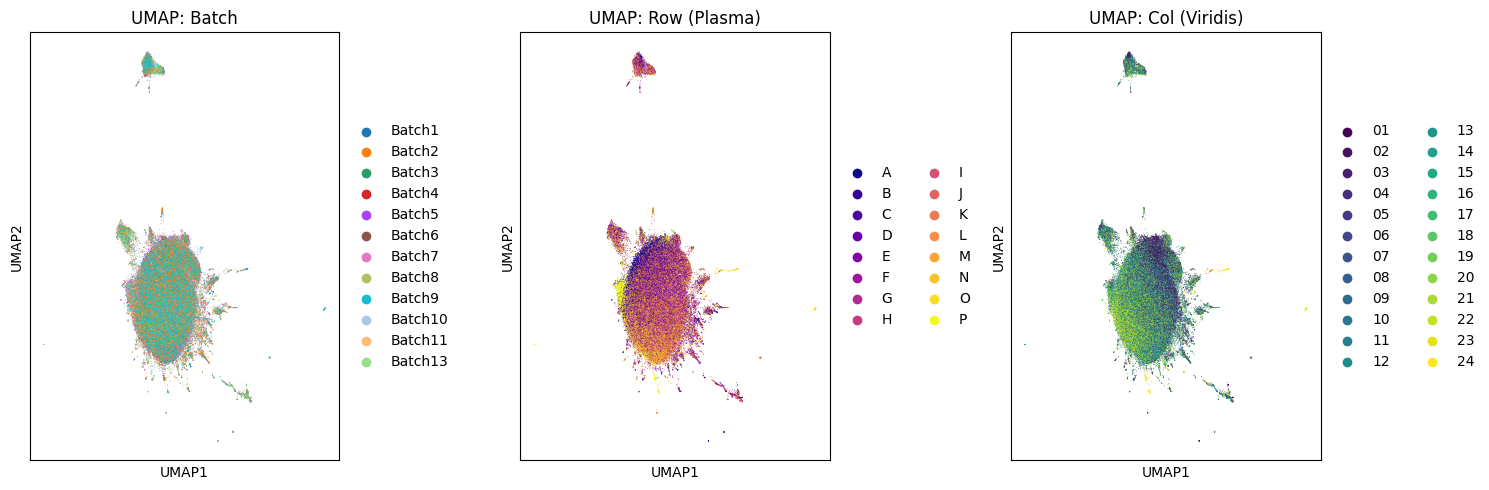

In [ ]:
data_all = ad.read_h5ad('/data/pub/cell/cpg0016_source4/cpg0016orf.h5ad')
data_csv = merge_csv('/data/pub/cell/cpg0016_source4/merged_embeddings_all/')
data_concat = merge_csv2h5ad(data_csv,data_all)
data_concat = MAD(data_concat)
sc.pp.scale(data_concat)   
dat = DataSet(data_concat,batch_size=256,mod=1)
labeled(data_concat,Mnn=5,Knn=10,Mnn_list=['batch','row','col'],Knn_list=['batch','row','col'])   
cpDistiller =  cpDistiller_Model(dat,epochs=50,model_path='./ckpts/',reduction='mean',mo='cpDistiller-B',name='1000')
cpDistiller.load_model('/data/ckpts/1000/final_model_ema.ckpt')
cpDistiller.train()
result,category = cpDistiller.eval(dat.data)
name = 'cpDistiller_embeddings'
data.obsm[name]=result
sc.pp.neighbors(data, n_neighbors=15, use_rep=name)
sc.tl.umap(data, random_state=9000, min_dist=0.1)
plt.figure(figsize=(15, 5))
sc.pl.umap(data, color="batch", ax=plt.subplot(1, 3, 1), show=False)
plt.title('UMAP: Batch')
sc.pl.umap(data, color="row", palette='plasma', ax=plt.subplot(1, 3, 2), show=False)
plt.title('UMAP: Row (Plasma)')
sc.pl.umap(data, color="col", palette='viridis', ax=plt.subplot(1, 3, 3), show=False)
plt.title('UMAP: Col (Viridis)')
plt.tight_layout()
plt.show()

<div class="alert note">
<p>
We observed perturbations on target plates, using the UMAP to illustrate the degree of differentiation among different ORF perturbations. The perturbations on target plates are typically used for data alignment (see <a href="https://www.nature.com/articles/s41467-024-50613-5" target="_blank">here</a>).
</p>
</div>


In [4]:
perturbation=['JCP2022_062592', 'JCP2022_009867', 'JCP2022_047545', 'JCP2022_017377', 'JCP2022_032680', 
               'JCP2022_064022', 'JCP2022_069131', 'JCP2022_084606', 'JCP2022_000794', 'JCP2022_116749', 
               'JCP2022_077089', 'JCP2022_027206', 'JCP2022_064903', 'JCP2022_068713', 'JCP2022_106219',
               'JCP2022_033400', 'JCP2022_055397', 'JCP2022_011759', 'JCP2022_054601', 'JCP2022_067432', 
               'JCP2022_067441', 'JCP2022_055904', 'JCP2022_060734', 'JCP2022_033914','JCP2022_046462',
               'JCP2022_116560', 'JCP2022_010404', 'JCP2022_014367', 'JCP2022_039863','JCP2022_115963',
               'JCP2022_007613','JCP2022_100876','JCP2022_050162','JCP2022_061654']

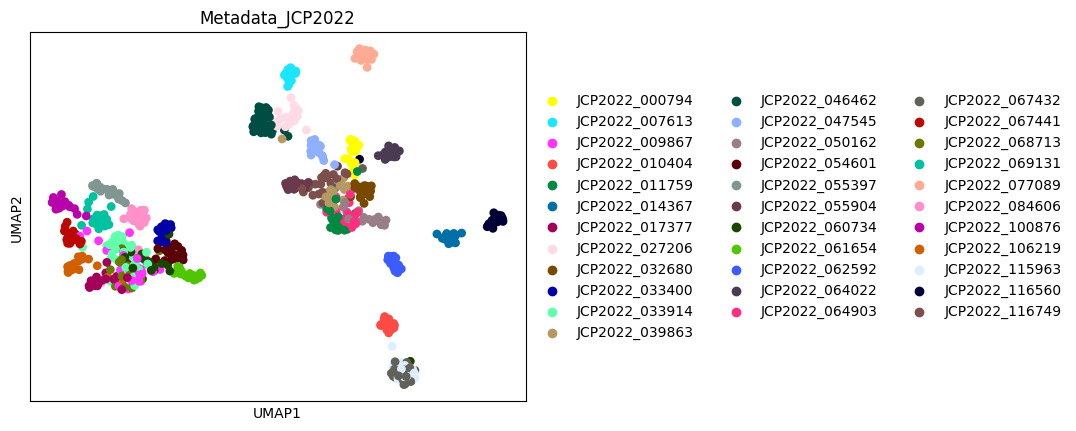

In [5]:
data_choosen = data[data.obs['Metadata_JCP2022'].isin(perturbation)]
sc.pp.neighbors(data_choosen, n_neighbors=15, use_rep=name, metric="cosine")
sc.tl.umap(data_choosen)
sc.pl.umap(data_choosen, color="Metadata_JCP2022")

<div class="alert note">
<p>
We used cpDistiller-C to correct triple effects, using only CellProfiler-based features.
</p>
</div>


2025-05-23 17:22:50,915 - INFO - MNN pairs num: 182682
2025-05-23 17:23:06,498 - INFO - KNN pairs num: 27622
2025-05-23 17:23:48,568 - INFO - GMVAE(
  (encode): GM_Encoder(
    (qy_x): Sequential(
      (0): Linear(in_features=1446, out_features=512, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=512, out_features=512, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
    )
    (GumbelSoftmax): GumbelSoftmax(
      (logits): Linear(in_features=512, out_features=10, bias=True)
    )
    (qz_yx): Sequential(
      (0): Linear(in_features=1456, out_features=512, bias=True)
      (1): LeakyReLU(negative_slope=0.01)
      (2): Linear(in_features=512, out_features=512, bias=True)
      (3): LeakyReLU(negative_slope=0.01)
    )
    (Gaussian): Gaussian(
      (mu): Sequential(
        (0): Linear(in_features=512, out_features=50, bias=True)
      )
      (var): Sequential(
        (0): Linear(in_features=512, out_features=50, bias=True)
        (1): Soft

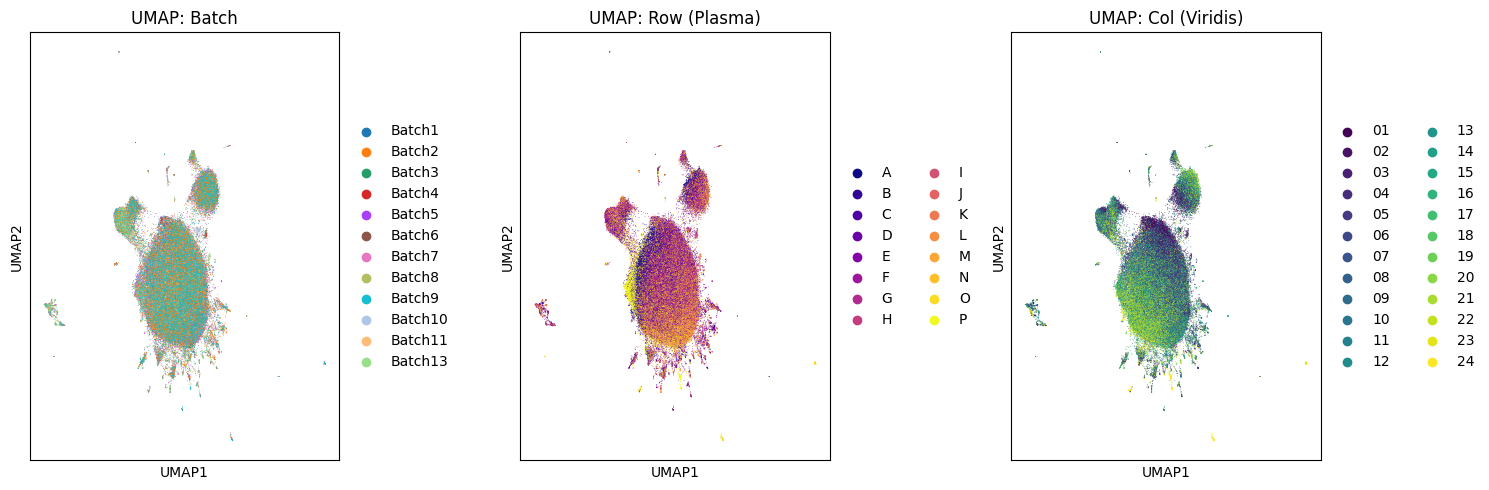

In [ ]:
data_all = ad.read_h5ad('/data/pub/cell/cpg0016_source4/cpg0016orf.h5ad')
data_concat = MAD(data_all)
sc.pp.scale(data_concat)   
dat = DataSet(data_concat,batch_size=256,mod=1)
labeled(data_concat,Mnn=5,Knn=10,Mnn_list=['batch','row','col'],Knn_list=['batch','row','col'],deep_dim=0) 
cpDistiller =  cpDistiller_Model(dat,epochs=50,model_path='./ckpts/',name='1000_cell',reduction='mean',mo='cpDistiller-C') #  Alternatively, you can set the 'mo' to 'cpDistiller-C' but provide only cpDistiller-extractor-based features as input, using a variant that does not rely on CellProfiler-based features (cpDistiller-D).
cpDistiller.load_model('/data/ckpts/1000_cell/final_model_ema.ckpt')
cpDistiller.train()
result,category = cpDistiller.eval(dat.data)
name = 'cpDistiller_embeddings_cell'
data.obsm[name]=result
sc.pp.neighbors(data, n_neighbors=15, use_rep=name)
sc.tl.umap(data, random_state=9000, min_dist=0.1)
plt.figure(figsize=(15, 5))
sc.pl.umap(data, color="batch", ax=plt.subplot(1, 3, 1), show=False)
plt.title('UMAP: Batch')
sc.pl.umap(data, color="row", palette='plasma', ax=plt.subplot(1, 3, 2), show=False)
plt.title('UMAP: Row (Plasma)')
sc.pl.umap(data, color="col", palette='viridis', ax=plt.subplot(1, 3, 3), show=False)
plt.title('UMAP: Col (Viridis)')
plt.tight_layout()
plt.show()

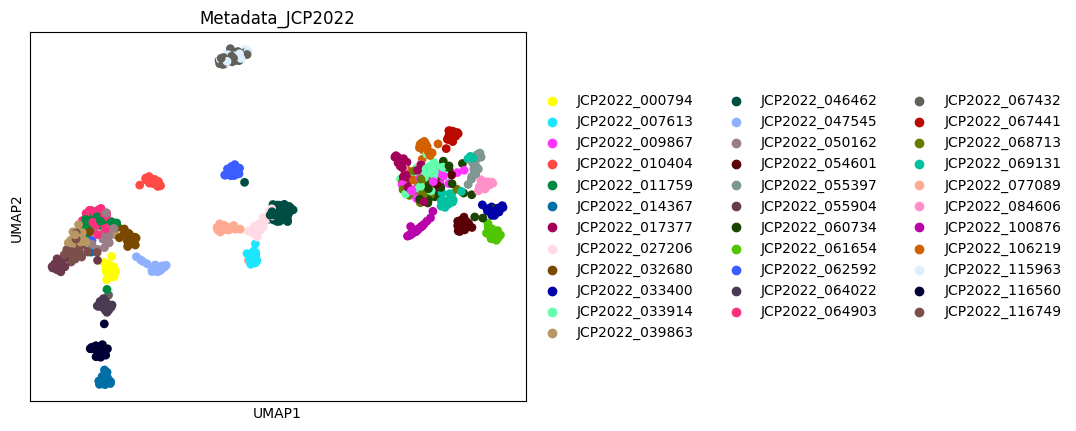

In [12]:
data_choosen = data[data.obs['Metadata_JCP2022'].isin(perturbation)]
sc.pp.neighbors(data_choosen, n_neighbors=15, use_rep=name, metric="cosine")
sc.tl.umap(data_choosen)
sc.pl.umap(data_choosen, color="Metadata_JCP2022")